[ERROR:0@5762.771] global persistence.cpp:512 open Can't open file: '/home/simtoon/git/attraction_classifier/venv/lib/python3.11/site-packages/cv2/data/haarcascade_mcs_nose.xml' in read mode
[ERROR:0@5762.771] global persistence.cpp:512 open Can't open file: '/home/simtoon/git/attraction_classifier/venv/lib/python3.11/site-packages/cv2/data/haarcascade_mcs_mouth.xml' in read mode


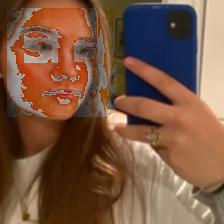

In [92]:
import numpy as np
import cv2
from PIL import Image

# read image as rgb using cv2
img = cv2.imread('test.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(img)

# haar
faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
noses = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_nose.xml')
mouths = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_mouth.xml')

# detect face and draw rectangle
face = faces.detectMultiScale(img, 4.55, 1)
eye = eyes.detectMultiScale(img, 1.3, 5)
# nose = noses.detectMultiScale(img, 1.3, 1)
# mouth = mouths.detectMultiScale(img, 1.3, 1)

for (x, y, w, h) in face:
    face_roi = img[y:y+h, x:x+w]
    # hsv_face_roi = cv2.cvtColor(face_roi, cv2.COLOR_RGB2HSV)
    hsv_face_roi[:,:,1] = hsv_face_roi[:,:,1]*1.5
    img[y:y+h, x:x+w] = cv2.cvtColor(hsv_face_roi, cv2.COLOR_HSV2RGB)

for (x, y, w, h) in eye:
    eye_roi = img[y:y+h, x:x+w]
    hsv_eye_roi = cv2.cvtColor(eye_roi, cv2.COLOR_RGB2HSV)
    hsv_eye_roi[:,:,1] = hsv_eye_roi[:,:,1]*1.5
    img[y:y+h, x:x+w] = cv2.cvtColor(hsv_eye_roi, cv2.COLOR_HSV2RGB)

# for (x,y,w,h) in nose:
    # cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
# 
# for (x,y,w,h) in mouth:
    # cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)


# cannny edge detection
# for (x, y, w, h) in rect_coords:
#     roi = img[y:y+h, x:x+w]
#     edges = cv2.Canny(roi, 100, 150)
#     img[y:y+h, x:x+w] = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

Image.fromarray(img)

In [6]:
import cv2
import dlib
dir(dlib)
help(dlib.get_frontal_face_detector())

Help on fhog_object_detector in module _dlib_pybind11 object:

class fhog_object_detector(pybind11_builtins.pybind11_object)
 |  This object represents a sliding window histogram-of-oriented-gradients based object detector.
 |  
 |  Method resolution order:
 |      fhog_object_detector
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(...)
 |      __call__(self: _dlib_pybind11.fhog_object_detector, image: numpy.ndarray, upsample_num_times: int = 0) -> _dlib_pybind11.rectangles
 |      
 |      requires 
 |          - image is a numpy ndarray containing either an 8bit grayscale or RGB 
 |            image. 
 |          - upsample_num_times >= 0 
 |      ensures 
 |          - This function runs the object detector on the input image and returns 
 |            a list of detections.   
 |          - Upsamples the image upsample_num_times before running the basic 
 |            detector.
 |  
 |  __getstate__(...)
 |      __g

In [9]:
from math import hypot
from PIL import Image

# Load the image
img_path = 'test.png'
img = cv2.imread(img_path)

# Convert to grayscale for feature detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector = dlib.fhog_object_detector("shape_predictor_68_face_landmarks.dat")
# Detect the face in the grayscale image
faces = detector(gray, 1)

# Initialize a list to store the facial landmarks
landmarks_list = []

# Loop over the face detections
for face in faces:
    # Determine the facial landmarks for the face region
    landmarks = detector(gray, face)
    
    # Convert the facial landmark (x, y)-coordinates to a list of tuples
    landmarks_list = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(0, landmarks.num_parts)]

# Calculate facial symmetry by landmarks in the list
# For simplicity, consider the eyes and the mouth for symmetry
def distance(point1, point2):
    return hypot(point1[0] - point2[0], point1[1] - point2[1])

# Calculate eye symmetry
eye_left = landmarks_list[36:42]  # Left eye
eye_right = landmarks_list[42:48] # Right eye
eye_symmetry = distance(eye_left[0], eye_right[3]) / distance(eye_left[3], eye_right[0])

# Calculate mouth symmetry (corners of the mouth)
mouth_symmetry = distance(landmarks_list[48], landmarks_list[54])

# Calculate proportionate features (eye to face width ratio)
face_width = distance(landmarks_list[0], landmarks_list[16])
eye_to_face_ratio = (distance(eye_left[0], eye_right[3]) + distance(eye_left[3], eye_right[0])) / (2 * face_width)

# Youthful appearance (cheek fullness)
cheek_fullness = (distance(landmarks_list[3], landmarks_list[13]) / face_width)

# Aggregate the features into a dictionary
features = {
    'eye_symmetry': eye_symmetry,
    'mouth_symmetry': mouth_symmetry,
    'eye_to_face_ratio': eye_to_face_ratio,
    'cheek_fullness': cheek_fullness
}

features


RuntimeError: Unsupported version found when deserializing a scan_fhog_pyramid object.